<a href="https://colab.research.google.com/github/vishal0820/Delhivery-CaseStudy/blob/main/Delhivery_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Delhivery Business Case Study</center>

# Introduction
Delhivery, India's leading and rapidly growing integrated player, has set its sights on creating
the commerce operating system.
They achieve this by utilizing world-class infrastructure, ensuring the highest quality in
logistics operations, and harnessing cutting-edge engineering and technology capabilities.
### What is expected
The company wants to understand and process the data coming out of data engineering
pipelines: \
● Clean, sanitize and manipulate data to get useful features out of raw fields \
● Make sense out of the raw data and help the data science team to build forecasting
models on it.

# 1. Data



# 2. Libraries
Below are the libraries required for analysing and visualizing data

In [1]:
# libraries to analyze data
import numpy as np
import pandas as pd
import scipy.stats as sps

# libraries to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# Misc libraries
import random

# 3. Data loading and exploratory data analysis

Loading the data into Pandas dataframe for easily handling of data

In [2]:
# read the file into a pandas dataframe
df = pd.read_csv('delhivery_data.csv')
# look at the datatypes of the columns
print('*************************************************')
print(df.info())
print('*************************************************\n')
print('*************************************************')
print(f'Shape of the dataset is {df.shape}')
print('*************************************************\n')
print('*************************************************')
print(f'Number of nan/null values in each column: \n{df.isna().sum()}')
print('*************************************************\n')
print('*************************************************')
print(f'Number of unique values in each column: \n{df.nunique()}')
print('*************************************************\n')
print('*************************************************')
print(f'Duplicate entries: \n{df.duplicated().value_counts()}')
print('*************************************************')

*************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8194 entries, 0 to 8193
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   data                            8194 non-null   object 
 1   trip_creation_time              8194 non-null   object 
 2   route_schedule_uuid             8194 non-null   object 
 3   route_type                      8194 non-null   object 
 4   trip_uuid                       8194 non-null   object 
 5   source_center                   8194 non-null   object 
 6   source_name                     8169 non-null   object 
 7   destination_center              8194 non-null   object 
 8   destination_name                8184 non-null   object 
 9   od_start_time                   8194 non-null   object 
 10  od_end_time                     8194 non-null   object 
 11  start_scan_to_end_scan          8194 non-null

In [3]:
# look at the top 5 rows
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


## Insight
- A quick look at the information of the data reveals that there are **144867 rows and 24 columns** implying 144867 trips have been made with each trip having information such as *trip_creation_time, trip_uuid, source_center, source_name, destination_center, destination_name* to name a few. Most of the datatype are either "object" or "float64" except for *is_cutoff* and *cutoff_factor*.
- We can also infer that **there are 293 missing values or null value in source_name and 261 missing values or null value in destination_name** in the dataset. As these numbers are small compared to dataset size, 144867, it is safe to drop the rows with the missing values
- There are **no duplicate entries**.
- As columns *is_cutoff, cutoff_factor, cutoff_timestamp, factor and segment_factor* are Unknown fields,there is no harm in dropping these columns.
- It makes sense to convert columns *data and route_type* to "category" datatype
- It makes sense to convert columns *trip_creation_time, od_start_time, od_end_time* to "datetime" datatype

In [4]:
df = df.dropna(how='any')
df = df.drop(columns = ["is_cutoff", "cutoff_factor", "cutoff_timestamp", "factor", "segment_factor"])
df["data"] = df["data"].astype("category")
df["route_type"] = df["route_type"].astype("category")
df["trip_creation_time"] = pd.to_datetime(df["trip_creation_time"], format='%Y-%m-%d %H:%M:%S.%f')
df["od_start_time"] = pd.to_datetime(df["od_start_time"], format='%Y-%m-%d %H:%M:%S.%f')
df["od_end_time"] = pd.to_datetime(df["od_end_time"], format='%Y-%m-%d %H:%M:%S.%f')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8158 entries, 0 to 8192
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   data                            8158 non-null   category      
 1   trip_creation_time              8158 non-null   datetime64[ns]
 2   route_schedule_uuid             8158 non-null   object        
 3   route_type                      8158 non-null   category      
 4   trip_uuid                       8158 non-null   object        
 5   source_center                   8158 non-null   object        
 6   source_name                     8158 non-null   object        
 7   destination_center              8158 non-null   object        
 8   destination_name                8158 non-null   object        
 9   od_start_time                   8158 non-null   datetime64[ns]
 10  od_end_time                     8158 non-null   datetime64[ns]
 11  start_sca

In [6]:
df.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
count,8158,8158,8158,8158.000000,8158.000000,8158.000000,8158.000000,8158.000000,8158.000000,8158.000000,8158.000000
mean,2018-09-22 23:12:33.327985664,2018-09-23 03:20:51.278299648,2018-09-23 16:58:20.469313280,816.995342,199.789186,355.878647,184.807796,244.137313,35.754352,17.985413,21.917920
min,2018-09-12 00:25:19.499696,2018-09-12 00:46:48.079257,2018-09-12 01:53:32.471405,25.000000,9.000267,9.000000,6.000000,9.202000,-26.000000,0.000000,0.000000
25%,2018-09-17 06:05:38.430885120,2018-09-17 11:08:13.273317120,2018-09-18 01:19:19.879985920,142.000000,22.674766,47.000000,25.000000,27.904750,19.000000,10.000000,11.473400
50%,2018-09-23 01:22:00.932464896,2018-09-23 05:18:58.024569088,2018-09-23 22:46:22.215742976,350.000000,45.884425,107.000000,54.000000,61.635600,28.000000,17.000000,23.089650
75%,2018-09-28 04:51:24.498247936,2018-09-28 07:07:01.819709952,2018-09-29 03:12:56.095055872,1087.000000,199.022722,378.000000,186.000000,242.010000,40.000000,22.000000,27.311875
max,2018-10-03 23:54:58.720536,2018-10-04 07:25:09.837533,2018-10-05 08:18:50.827953,3341.000000,1722.009755,3031.000000,1611.000000,2191.166400,2297.000000,383.000000,439.604700
std,NaN,NaN,NaN,961.042428,325.510060,549.697151,293.600155,400.675450,52.359703,12.671534,14.626541


## Insight
- The data is provided from **2018-09-12 00:00:16.535741 to 2018-10-03 23:59:42.701692**
- The **average time** taken to deliver from source to destination is **964 mins** with **least time being 20mins** and **maximum time being 7898 mins**
- The **average distance** between source and destination warehouse is **235 Kms** with **least distance being 9 Kms** and **maximum distance being 1927 Kms**

# 4. Detailed Analysis
## 4.1. Detecting outliers
### 4.1.1. Outliers for every continuous variable

In [7]:
# helper function to detect outliers
def detectOutliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    lower_outliers = df[df<(q1-1.5*iqr)]
    higher_outliers = df[df>(q3+1.5*iqr)]
    return lower_outliers, higher_outliers

In [8]:
numerical_columns = ['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']
column_outlier_dictionary = {}
for column in numerical_columns:
    print('*'*50)
    print(f'Outliers of \'{column}\' column are:')
    lower_outliers, higher_outliers = detectOutliers(df[column])
    print("Lower outliers:\n", lower_outliers)
    print("Higher outliers:\n", higher_outliers)
    print('*'*50, end="\n")
    column_outlier_dictionary[column] = [lower_outliers, higher_outliers]

**************************************************
Outliers of 'start_scan_to_end_scan' column are:
Lower outliers:
 Series([], Name: start_scan_to_end_scan, dtype: float64)
Higher outliers:
 645     3027.0
646     3027.0
647     3027.0
648     3027.0
649     3027.0
         ...  
7318    3178.0
7319    3178.0
7320    3178.0
7321    3178.0
7322    3178.0
Name: start_scan_to_end_scan, Length: 939, dtype: float64
**************************************************
**************************************************
Outliers of 'actual_distance_to_destination' column are:
Lower outliers:
 Series([], Name: actual_distance_to_destination, dtype: float64)
Higher outliers:
 392     484.628510
393     506.815545
394     528.025249
395     550.008797
396     572.052195
           ...    
8132    683.309367
8133    704.519419
8134    726.268400
8135    748.205618
8136    754.385852
Name: actual_distance_to_destination, Length: 1162, dtype: float64
**************************************************

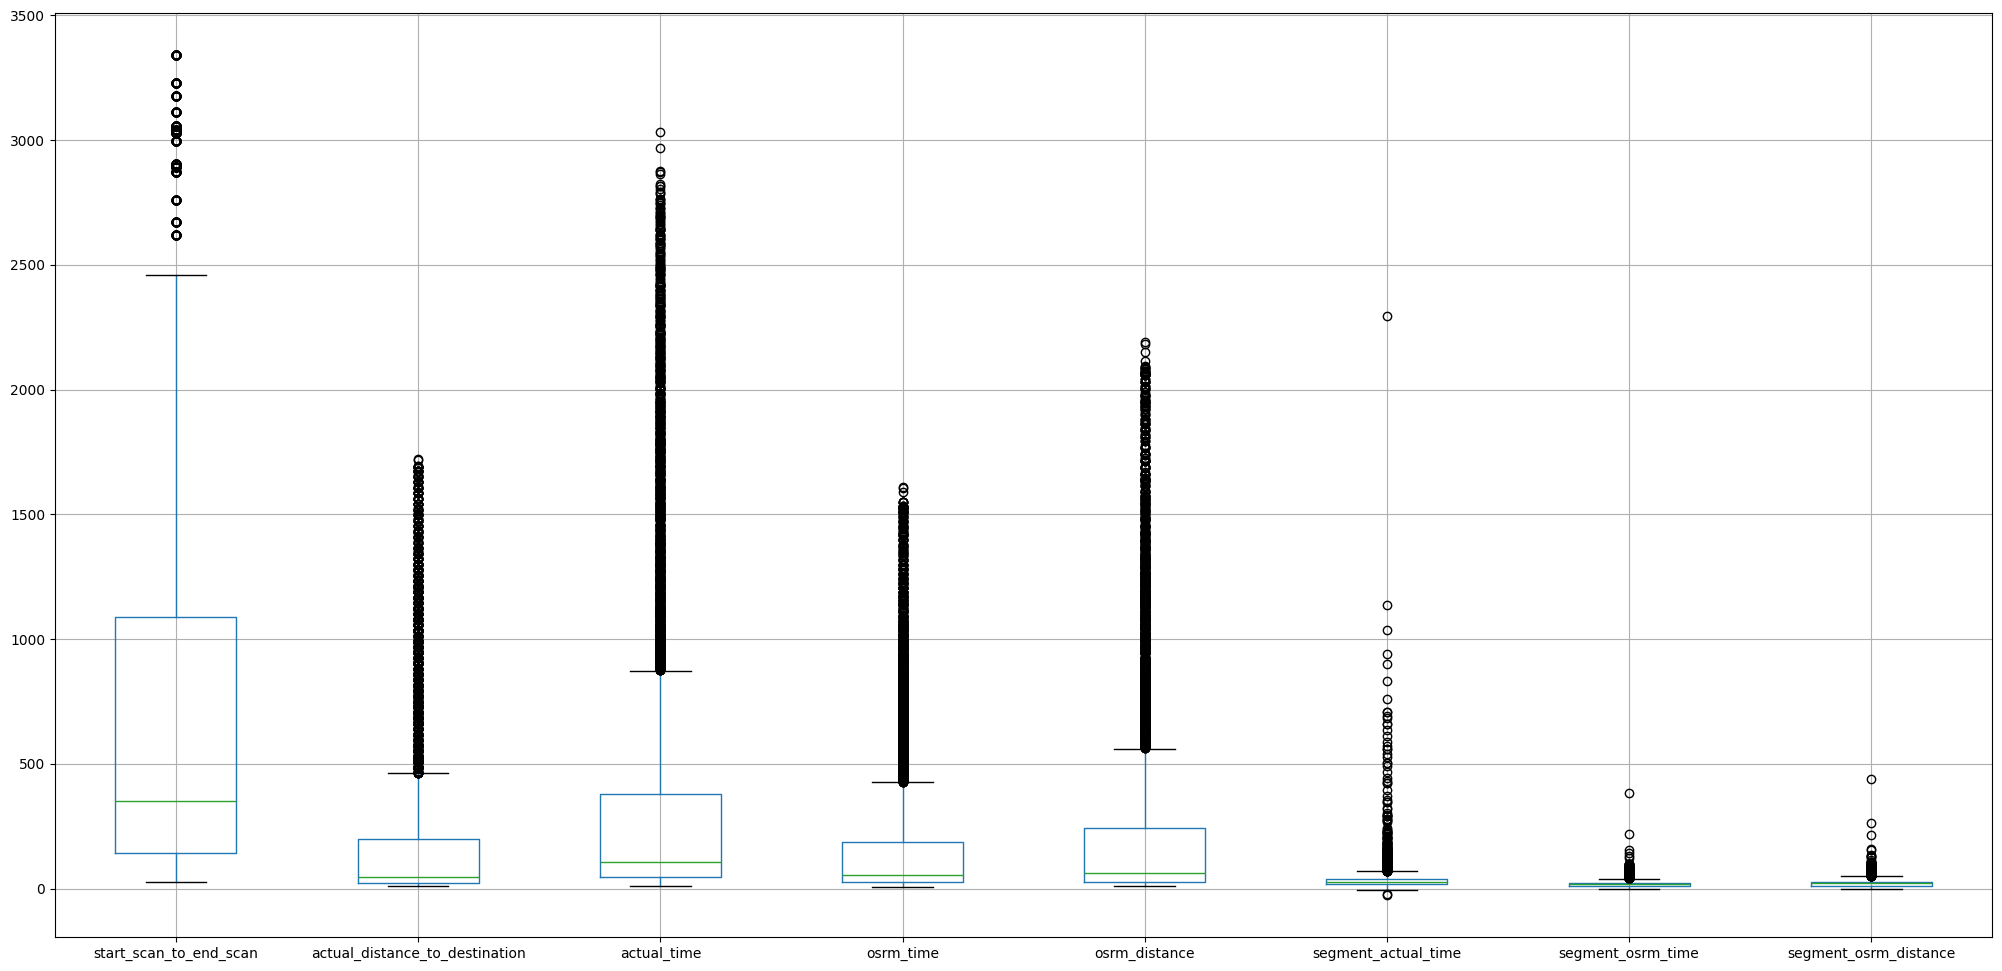

In [9]:
df[numerical_columns].boxplot(figsize=(25,12))
plt.show()

In [10]:
for key, value in column_outlier_dictionary.items():
    print(f'The column \'{key}\' has {len(value[0]) + len(value[1])} outliers')

The column 'start_scan_to_end_scan' has 939 outliers
The column 'actual_distance_to_destination' has 1162 outliers
The column 'actual_time' has 1089 outliers
The column 'osrm_time' has 1140 outliers
The column 'osrm_distance' has 1148 outliers
The column 'segment_actual_time' has 485 outliers
The column 'segment_osrm_time' has 303 outliers
The column 'segment_osrm_distance' has 224 outliers


## Insight
- I will not be removing any outliers now.

### 4.1.2. Remove the outliers

In [11]:
remove_outliers = False
if True == remove_outliers:
    for key, value in column_outlier_dictionary.items():
        lower_outliers = value[0]
        higher_outliers = value[1]
        df.drop(lower_outliers.index, inplace=True)
        df.drop(higher_outliers.index, inplace=True)
else:
    print('Not removing any outliers')

Not removing any outliers


## 4.2. Univariate analysis
### 4.2.1. Numerical Variables

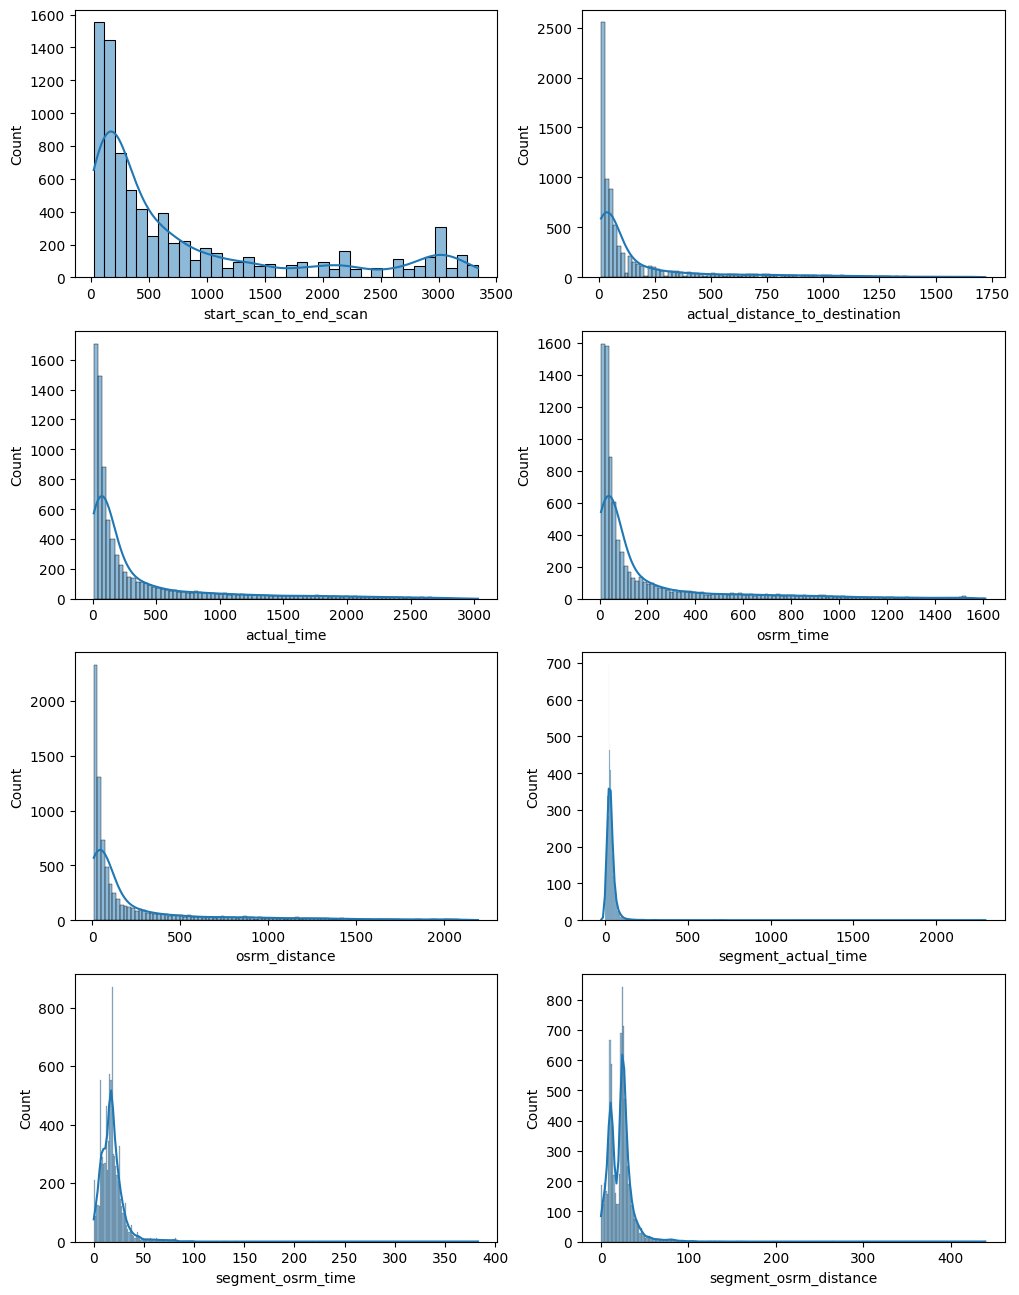

In [12]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize = (12, 16))
sns.histplot(data=df, x = "start_scan_to_end_scan", kde=True, ax=ax[0,0])
sns.histplot(data=df, x = "actual_distance_to_destination", kde=True, ax=ax[0,1])
sns.histplot(data=df, x = "actual_time", kde=True, ax=ax[1,0])
sns.histplot(data=df, x = "osrm_time", kde=True, ax=ax[1,1])
sns.histplot(data=df, x = "osrm_distance", kde=True, ax=ax[2,0])
sns.histplot(data=df, x = "segment_actual_time", kde=True, ax=ax[2,1])
sns.histplot(data=df, x = "segment_osrm_time", kde=True, ax=ax[3,0])
sns.histplot(data=df, x = "segment_osrm_distance", kde=True, ax=ax[3,1])
plt.show()

### 4.2.2. Categorical Variables

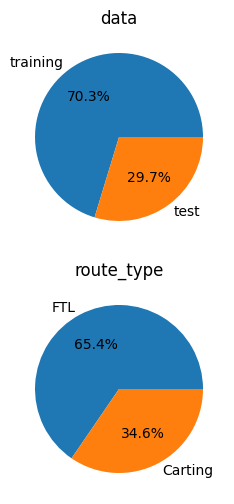

In [13]:
categorical_columns = ["data", "route_type"]
plt.figure(figsize=(6,6))
plt.subplot(2,1,1)
data = df["data"].value_counts()
plt.pie(data.values, labels = data.index, autopct='%.1f%%')
plt.title("data")
plt.subplot(2,1,2)
data = df["route_type"].value_counts()
plt.pie(data.values, labels = data.index, autopct='%.1f%%')
plt.title("route_type")
plt.show()

## Insight
- The histogram plot of all the **numerical** values show that all the **data is right skewed**
- **72.5%** of the data is **training** data and remaining **27.5%** is **testing** data
- **68.7%** of the delivery is done via **FTL** and remaining **31.3%** through **Carting**

## 4.3. Multivariate analysis

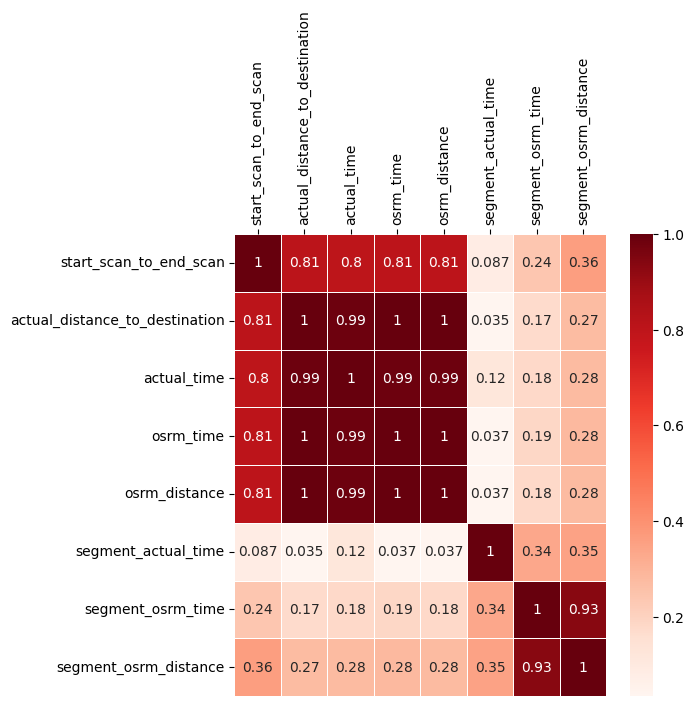

In [14]:
fig, ax = plt.subplots(figsize=(6,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, linewidth=0.5, cmap = "Reds", ax=ax)
ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.show()

## Insight
- The heatmap clearly shows high correlation between time and distance. This is expected as the delivery time increases with increase in distance
- *actual_distance_to_destination, actual_time, osrm_time and osrm_distance* are highly correlated
- *segment_osrm_time and segment_osrm_distance* are highly correlated

## 4.4. Merging rows
The delivery details of one package is divided into several rows.
Creating a unique identifier, called *segment_key*, for different segments of a trip based on the combination of *trip_uuid, source_center, and destination_center* and then merge the rows of columns *segment_actual_time,
segment_osrm_distance and segment_osrm_time* with same *segment_key* to form new columns *segment_actual_time_sum,
segment_osrm_distance_sum, segment_osrm_time_sum*

In [15]:
df["segment_key"] = df["trip_uuid"] + '_' + df["source_center"] + '_' + df["destination_center"]
df = df.drop(columns=["source_center", "destination_center"])
segment_columns = ["segment_actual_time", "segment_osrm_distance", "segment_osrm_time"]
for col in segment_columns:
    df[col + "_sum"] = df.groupby("segment_key")[col].cumsum()

In [16]:
df.head(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,...,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_key,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,14.0,11.0,11.9653,14.0,11.0,11.9653,trip-153741093647649320_IND388121AAA_IND388620AAB,14.0,11.9653,11.0
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,24.0,20.0,21.7243,10.0,9.0,9.7590,trip-153741093647649320_IND388121AAA_IND388620AAB,24.0,21.7243,20.0
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,40.0,28.0,32.5395,16.0,7.0,10.8152,trip-153741093647649320_IND388121AAA_IND388620AAB,40.0,32.5395,27.0
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,62.0,40.0,45.5620,21.0,12.0,13.0224,trip-153741093647649320_IND388121AAA_IND388620AAB,61.0,45.5619,39.0
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,...,68.0,44.0,54.2181,6.0,5.0,3.9153,trip-153741093647649320_IND388121AAA_IND388620AAB,67.0,49.4772,44.0
5,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,...,15.0,11.0,12.1171,15.0,11.0,12.1171,trip-153741093647649320_IND388620AAB_IND388320AAA,15.0,12.1171,11.0
6,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,...,44.0,17.0,21.2890,28.0,6.0,9.1719,trip-153741093647649320_IND388620AAB_IND388320AAA,43.0,21.2890,17.0
7,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,...,65.0,29.0,35.8252,21.0,11.0,14.5362,trip-153741093647649320_IND388620AAB_IND388320AAA,64.0,35.8252,28.0
8,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,...,76.0,39.0,47.1900,10.0,10.0,11.3648,trip-153741093647649320_IND388620AAB_IND388320AAA,74.0,47.1900,38.0
9,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,...,102.0,45.0,53.2334,26.0,6.0,6.0434,trip-153741093647649320_IND388620AAB_IND388320AAA,100.0,53.2334,44.0


Grouping the data by *segment_key*, with aggregation defined for each column, and creating a new dataframe *segment*

In [17]:
segment_dict = {
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'trip_uuid' : 'first',
    'source_name' : 'first',
    'destination_name' : 'last',
    'od_start_time' : 'first',
    'od_end_time' : 'last',
    'start_scan_to_end_scan' : 'first',
    'actual_distance_to_destination' : 'last',
    'actual_time' : 'last',
    'osrm_time' : 'last',
    'osrm_distance' : 'last',
    'segment_actual_time_sum' : 'last',
    'segment_osrm_distance_sum' : 'last',
    'segment_osrm_time_sum' : 'last',
}

segment_df = df.groupby('segment_key').agg(segment_dict).reset_index()
segment_df = segment_df.sort_values(by=['segment_key', 'od_end_time'], ascending=True).reset_index()

In [18]:
segment_df.head()

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum
0,0,trip-153671191949943656_IND487001AAB_IND487551AAA,training,2018-09-12 00:25:19.499696,thanos::sroute:0ac760f3-96cb-4046-bfd0-8bc4678...,FTL,trip-153671191949943656,Narsinghpur_KndliDPP_D (Madhya Pradesh),Gadarwara_MPward_D (Madhya Pradesh),2018-09-12 04:33:09.726898,2018-09-12 05:59:13.062416,86.0,42.630333,78.0,42.0,48.4129,78.0,48.4129,41.0
1,1,trip-153671191949943656_IND487551AAA_IND464668AAA,training,2018-09-12 00:25:19.499696,thanos::sroute:0ac760f3-96cb-4046-bfd0-8bc4678...,FTL,trip-153671191949943656,Gadarwara_MPward_D (Madhya Pradesh),Bareli_SourvDPP_D (Madhya Pradesh),2018-09-12 05:59:13.062416,2018-09-12 09:23:49.463096,204.0,57.345262,175.0,63.0,76.0934,174.0,92.1494,91.0
2,2,trip-153671237597058150_IND785690AAB_IND785682AAA,training,2018-09-12 00:32:55.970840,thanos::sroute:db0f8027-8ade-4411-9aff-b26adaa...,Carting,trip-153671237597058150,Sonari_Central_DPP_1 (Assam),Sivasagar_Babupaty_D (Assam),2018-09-12 03:48:42.530167,2018-09-12 08:00:47.150111,252.0,39.495954,241.0,33.0,46.9087,240.0,56.7577,49.0
3,3,trip-153671262893947351_IND500055AAC_IND501401AAC,training,2018-09-12 00:37:08.939733,thanos::sroute:beb73e7f-71ff-4501-bc17-191b4f3...,Carting,trip-153671262893947351,Hyderabad_North_D_2 (Telangana),Medchal_MROoffce_D (Telangana),2018-09-12 01:05:52.573005,2018-09-12 02:05:34.840021,59.0,14.859201,30.0,12.0,16.0049,30.0,16.0049,12.0
4,4,trip-153671262893947351_IND501401AAC_IND500010AAA,training,2018-09-12 00:37:08.939733,thanos::sroute:beb73e7f-71ff-4501-bc17-191b4f3...,Carting,trip-153671262893947351,Medchal_MROoffce_D (Telangana),Hyderabad_Alwal_I (Telangana),2018-09-12 02:05:34.840021,2018-09-12 05:35:54.020732,210.0,9.499885,165.0,14.0,14.4597,165.0,14.4597,14.0


## 4.5. Feature Engineering
Extracting features from given data

Extracting time taken between *od_start_time* and *od_end_time*

In [19]:
segment_df['od_time_diff_hour'] = (segment_df['od_end_time'] - segment_df['od_start_time']).dt.total_seconds()/3600
segment_df = segment_df.drop(columns=['od_end_time', 'od_start_time'])

In [20]:
segment_df.head()

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_name,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour
0,0,trip-153671191949943656_IND487001AAB_IND487551AAA,training,2018-09-12 00:25:19.499696,thanos::sroute:0ac760f3-96cb-4046-bfd0-8bc4678...,FTL,trip-153671191949943656,Narsinghpur_KndliDPP_D (Madhya Pradesh),Gadarwara_MPward_D (Madhya Pradesh),86.0,42.630333,78.0,42.0,48.4129,78.0,48.4129,41.0,1.434260
1,1,trip-153671191949943656_IND487551AAA_IND464668AAA,training,2018-09-12 00:25:19.499696,thanos::sroute:0ac760f3-96cb-4046-bfd0-8bc4678...,FTL,trip-153671191949943656,Gadarwara_MPward_D (Madhya Pradesh),Bareli_SourvDPP_D (Madhya Pradesh),204.0,57.345262,175.0,63.0,76.0934,174.0,92.1494,91.0,3.410111
2,2,trip-153671237597058150_IND785690AAB_IND785682AAA,training,2018-09-12 00:32:55.970840,thanos::sroute:db0f8027-8ade-4411-9aff-b26adaa...,Carting,trip-153671237597058150,Sonari_Central_DPP_1 (Assam),Sivasagar_Babupaty_D (Assam),252.0,39.495954,241.0,33.0,46.9087,240.0,56.7577,49.0,4.201283
3,3,trip-153671262893947351_IND500055AAC_IND501401AAC,training,2018-09-12 00:37:08.939733,thanos::sroute:beb73e7f-71ff-4501-bc17-191b4f3...,Carting,trip-153671262893947351,Hyderabad_North_D_2 (Telangana),Medchal_MROoffce_D (Telangana),59.0,14.859201,30.0,12.0,16.0049,30.0,16.0049,12.0,0.995074
4,4,trip-153671262893947351_IND501401AAC_IND500010AAA,training,2018-09-12 00:37:08.939733,thanos::sroute:beb73e7f-71ff-4501-bc17-191b4f3...,Carting,trip-153671262893947351,Medchal_MROoffce_D (Telangana),Hyderabad_Alwal_I (Telangana),210.0,9.499885,165.0,14.0,14.4597,165.0,14.4597,14.0,3.505328


Extracting city, place, code and state from  *source_name* and *destination_name*

In [21]:
segment_df['source_state'] = segment_df['source_name'].str.extract(r'\((.*?)\)')
segment_df['source_data'] = segment_df['source_name'].str.extract(r'^(.*?)\(')
segment_df['source_data'] = segment_df['source_data'].str.strip()

segment_df['destination_state'] = segment_df['destination_name'].str.extract(r'\((.*?)\)')
segment_df['destination_data'] = segment_df['destination_name'].str.extract(r'^(.*?)\(')
segment_df['destination_data'] =segment_df['destination_data'].str.strip()

In [22]:
def extract_city_place_code(name):
    parts = name.split('_')
    num_of_parts = len(parts)
    if(num_of_parts == 3):
        city = parts[0]
        place = parts[1]
        code = parts[2]
    elif(num_of_parts == 2):
        city = parts[0]
        place = parts[1]
        code = 'none'
    else:
        city = parts[0]
        place = city
        code = 'none'

    if city == 'Bangalore' or city == 'HBR Layout PC' or city == 'BLR':
        city = 'Bengaluru'
    elif city == 'Mumbai Hub' or city == 'BOM':
        city = 'Mumbai'
    elif city == 'Del':
        city = 'Delhi'
    elif city == 'PNQ Pashan DPC' or city == 'PNQ Vadgaon Sheri DPC':
        city = 'Pune'
    elif city == 'MAA':
        city = 'Chennai'
    elif city == 'FBD':
        city = 'Faridabad'
    elif city == 'CCU':
        city = 'Kolkata'
    elif city == 'AMD':
        city = 'Ahmedabad'
    elif city == 'FBD':
        city = 'Faridabad'
    elif city == 'GGN':
        city = 'Gurgaon'
    elif city == 'GZB':
        city = 'Ghaziabad'

    return [city, place, code]


In [23]:
extracted_df = segment_df['source_data'].apply(lambda x: extract_city_place_code(x))
segment_df[['source_city','source_place','source_code']] = pd.DataFrame(extracted_df.tolist(), index= segment_df.index)
extracted_df = segment_df['destination_data'].apply(lambda x: extract_city_place_code(x))
segment_df[['destination_city','destination_place','destination_code']] = pd.DataFrame(extracted_df.tolist(), index= segment_df.index)
segment_df = segment_df.drop(columns=['source_name', 'source_data', 'destination_name', 'destination_data'])
segment_df.head()

,index,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,start_scan_to_end_scan,actual_distance_to_destination,actual_time,...,segment_osrm_time_sum,od_time_diff_hour,source_state,destination_state,source_city,source_place,source_code,destination_city,destination_place,destination_code
0,0,trip-153671191949943656_IND487001AAB_IND487551AAA,training,2018-09-12 00:25:19.499696,thanos::sroute:0ac760f3-96cb-4046-bfd0-8bc4678...,FTL,trip-153671191949943656,86.0,42.630333,78.0,...,41.0,1.434260,Madhya Pradesh,Madhya Pradesh,Narsinghpur,KndliDPP,D,Gadarwara,MPward,D
1,1,trip-153671191949943656_IND487551AAA_IND464668AAA,training,2018-09-12 00:25:19.499696,thanos::sroute:0ac760f3-96cb-4046-bfd0-8bc4678...,FTL,trip-153671191949943656,204.0,57.345262,175.0,...,91.0,3.410111,Madhya Pradesh,Madhya Pradesh,Gadarwara,MPward,D,Bareli,SourvDPP,D
2,2,trip-153671237597058150_IND785690AAB_IND785682AAA,training,2018-09-12 00:32:55.970840,thanos::sroute:db0f8027-8ade-4411-9aff-b26adaa...,Carting,trip-153671237597058150,252.0,39.495954,241.0,...,49.0,4.201283,Assam,Assam,Sonari,Sonari,none,Sivasagar,Babupaty,D
3,3,trip-153671262893947351_IND500055AAC_IND501401AAC,training,2018-09-12 00:37:08.939733,thanos::sroute:beb73e7f-71ff-4501-bc17-191b4f3...,Carting,trip-153671262893947351,59.0,14.859201,30.0,...,12.0,0.995074,Telangana,Telangana,Hyderabad,Hyderabad,none,Medchal,MROoffce,D
4,4,trip-153671262893947351_IND501401AAC_IND500010AAA,training,2018-09-12 00:37:08.939733,thanos::sroute:beb73e7f-71ff-4501-bc17-191b4f3...,Carting,trip-153671262893947351,210.0,9.499885,165.0,...,14.0,3.505328,Telangana,Telangana,Medchal,MROoffce,D,Hyderabad,Alwal,I


In [24]:
segment_df['trip_creation_year'] = segment_df['trip_creation_time'].dt.year
segment_df['trip_creation_month'] = segment_df['trip_creation_time'].dt.month
segment_df['trip_creation_day'] = segment_df['trip_creation_time'].dt.day
segment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   index                           1640 non-null   int64         
 1   segment_key                     1640 non-null   object        
 2   data                            1640 non-null   category      
 3   trip_creation_time              1640 non-null   datetime64[ns]
 4   route_schedule_uuid             1640 non-null   object        
 5   route_type                      1640 non-null   category      
 6   trip_uuid                       1640 non-null   object        
 7   start_scan_to_end_scan          1640 non-null   float64       
 8   actual_distance_to_destination  1640 non-null   float64       
 9   actual_time                     1640 non-null   float64       
 10  osrm_time                       1640 non-null   float64       
 11  osrm

## 4.6. In-depth analysis
### 4.6.1. Grouping and aggregating at trip-level
Group the *segment_df* by *trip_uuid*

In [25]:
trip_dict = {
    'segment_key' : 'first',
    'data' : 'first',
    'trip_creation_time' : 'first',
    'route_schedule_uuid' : 'first',
    'route_type' : 'first',
    'start_scan_to_end_scan' : 'sum',
    'actual_distance_to_destination' : 'sum',
    'actual_time' : 'sum',
    'osrm_time' : 'sum',
    'osrm_distance' : 'sum',
    'segment_actual_time_sum' : 'sum',
    'segment_osrm_distance_sum' : 'sum',
    'segment_osrm_time_sum' : 'sum',
    'od_time_diff_hour' : 'sum',
    'source_state' : 'first',
    'destination_state' : 'last',
    'source_city' : 'first',
    'source_place' : 'first',
    'source_code' : 'first',
    'destination_city' : 'last',
    'destination_place' : 'last',
    'destination_code' : 'last',
}
trip_df = segment_df.groupby('trip_uuid').agg(trip_dict).reset_index()

In [26]:
trip_df.head()

,trip_uuid,segment_key,data,trip_creation_time,route_schedule_uuid,route_type,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,...,segment_osrm_time_sum,od_time_diff_hour,source_state,destination_state,source_city,source_place,source_code,destination_city,destination_place,destination_code
0,trip-153671191949943656,trip-153671191949943656_IND487001AAB_IND487551AAA,training,2018-09-12 00:25:19.499696,thanos::sroute:0ac760f3-96cb-4046-bfd0-8bc4678...,FTL,290.0,99.975595,253.0,105.0,...,132.0,4.844371,Madhya Pradesh,Madhya Pradesh,Narsinghpur,KndliDPP,D,Bareli,SourvDPP,D
1,trip-153671237597058150,trip-153671237597058150_IND785690AAB_IND785682AAA,training,2018-09-12 00:32:55.970840,thanos::sroute:db0f8027-8ade-4411-9aff-b26adaa...,Carting,252.0,39.495954,241.0,33.0,...,49.0,4.201283,Assam,Assam,Sonari,Sonari,none,Sivasagar,Babupaty,D
2,trip-153671262893947351,trip-153671262893947351_IND500055AAC_IND501401AAC,training,2018-09-12 00:37:08.939733,thanos::sroute:beb73e7f-71ff-4501-bc17-191b4f3...,Carting,269.0,24.359086,195.0,26.0,...,26.0,4.500402,Telangana,Telangana,Hyderabad,Hyderabad,none,Hyderabad,Alwal,I
3,trip-153671320807895983,trip-153671320807895983_IND121004AAB_IND121102AAA,training,2018-09-12 00:46:48.079257,thanos::sroute:8c5ab716-198a-4395-b83f-5672773...,Carting,259.0,76.231506,145.0,57.0,...,55.0,4.340598,Haryana,Haryana,Faridabad,Balabhgarh,DPC,Faridabad,Balabhgarh,DPC
4,trip-153671549993828365,trip-153671549993828365_IND384205AAA_IND384355AAB,training,2018-09-12 01:24:59.938573,thanos::sroute:82facc11-0f66-496b-9d39-fa3891f...,FTL,562.0,176.405153,345.0,192.0,...,194.0,9.396947,Gujarat,Gujarat,Mehsana,Panchot,IP,Mehsana,Panchot,IP


### 4.6.2. Outlier Detection & Treatment

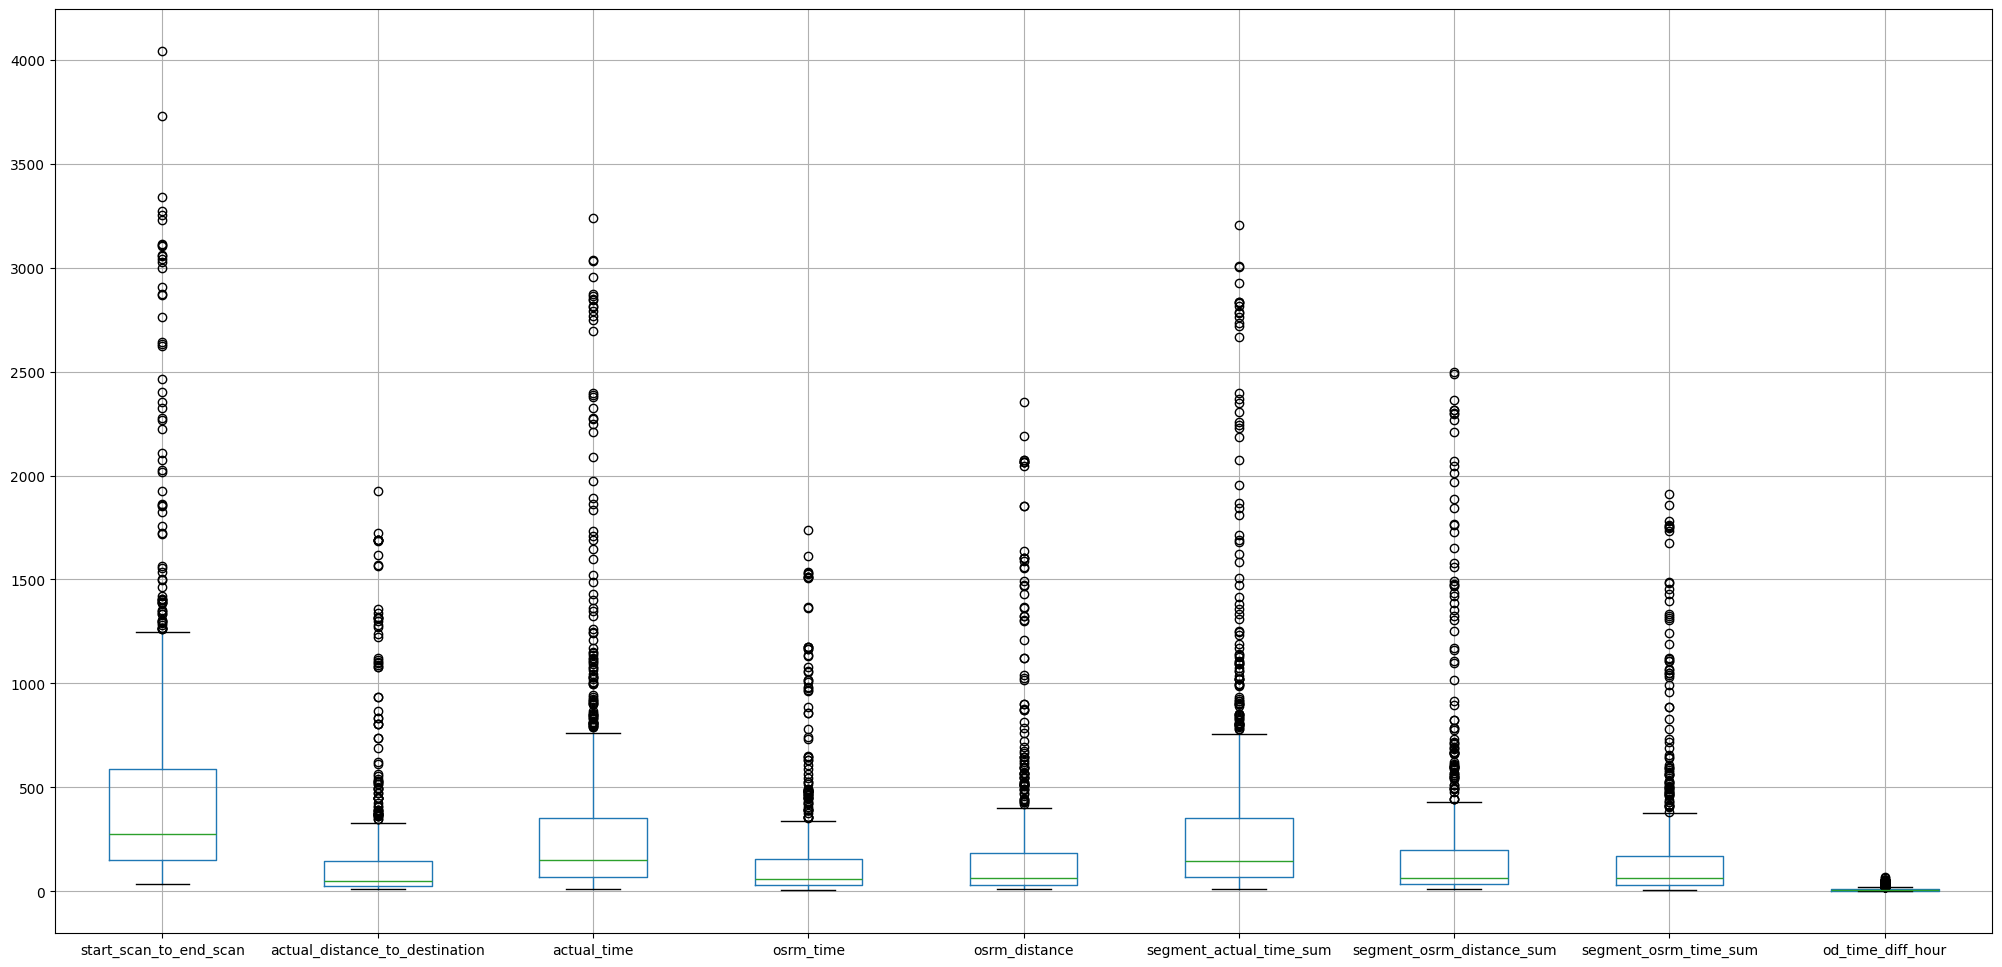

In [27]:
trip_numerical_columns = ['start_scan_to_end_scan', 'actual_distance_to_destination',
                          'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time_sum',
                          'segment_osrm_distance_sum', 'segment_osrm_time_sum', 'od_time_diff_hour']
trip_df[trip_numerical_columns].boxplot(figsize=(25,12))
plt.show()

In [28]:
Q1 = trip_df[trip_numerical_columns].quantile(0.25)
Q3 = trip_df[trip_numerical_columns].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
higher_bound = Q3 + 1.5*IQR
trip_df = trip_df[-((trip_df[trip_numerical_columns] < lower_bound) | (trip_df[trip_numerical_columns] > higher_bound)).any(axis=1)]
trip_df = trip_df.reset_index(drop=True)

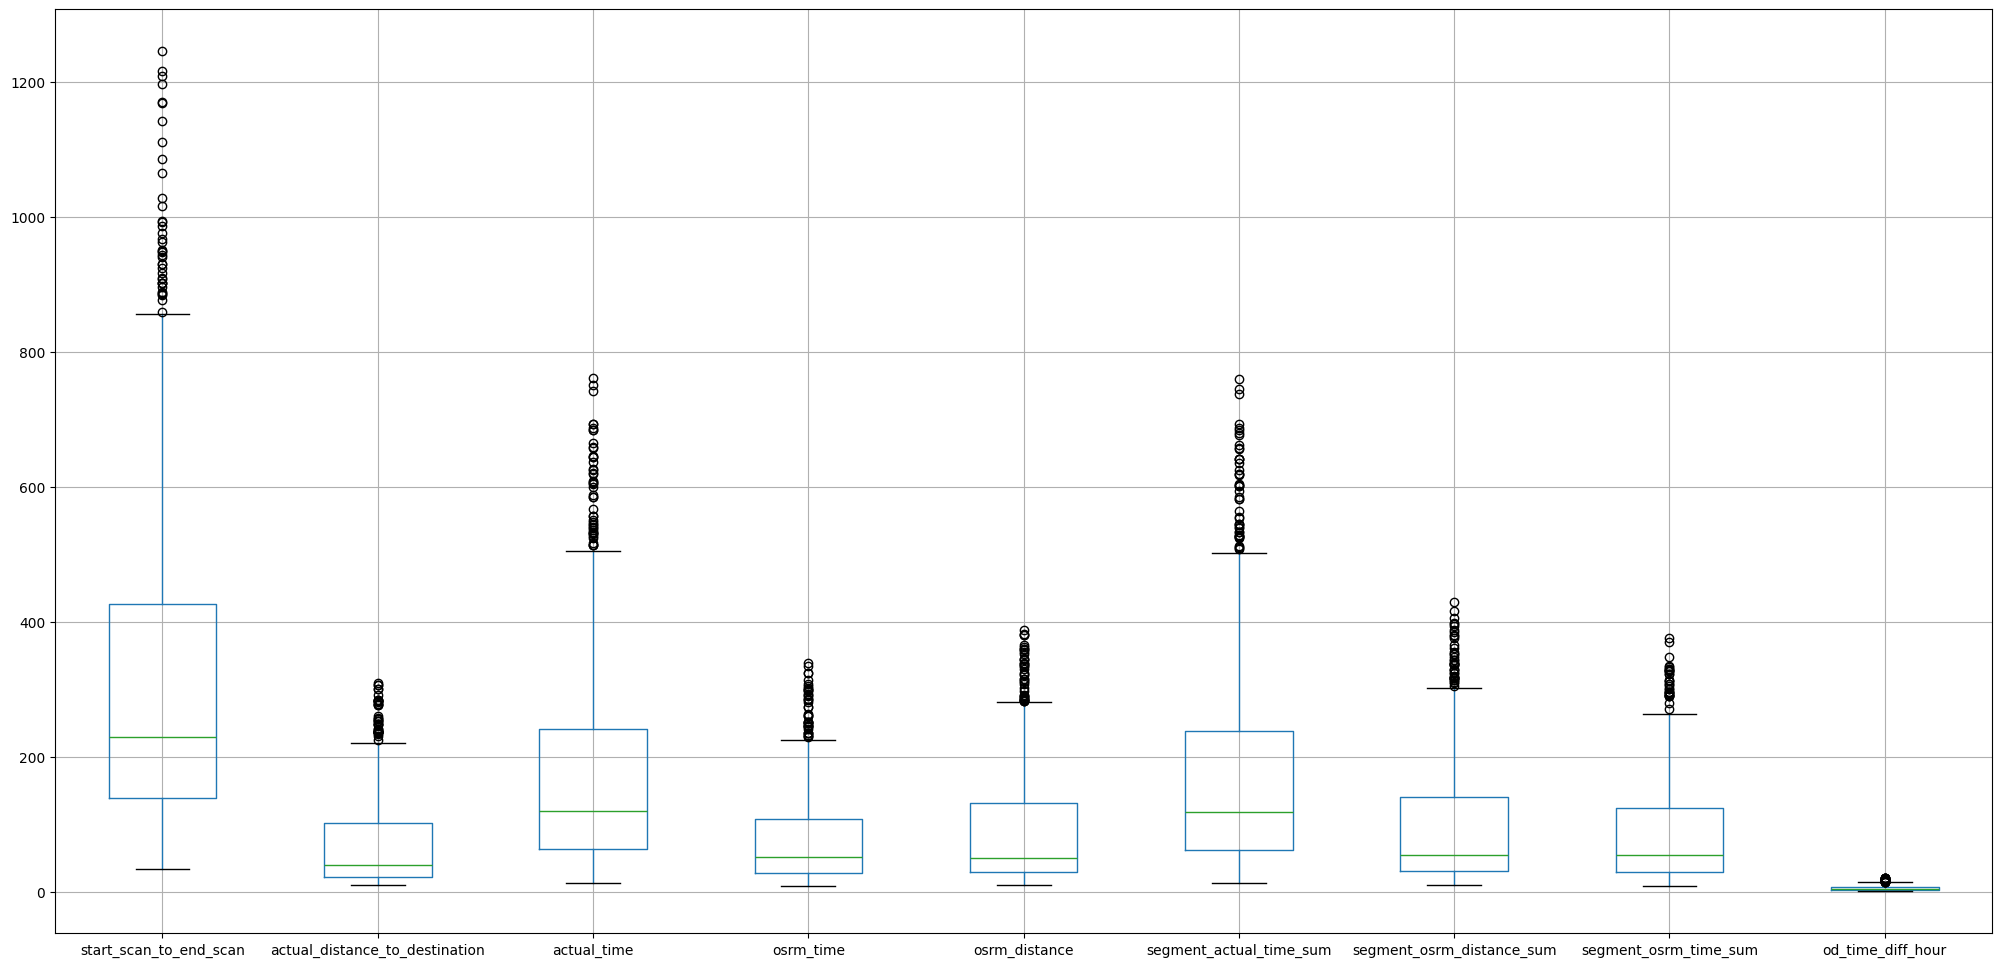

In [29]:
trip_df[trip_numerical_columns].boxplot(figsize=(25,12))
plt.show()

### 4.6.3. Perform one-hot encoding on categorical features
*route_type* is the only categorical feature

In [30]:
ohe_df = pd.get_dummies(trip_df['route_type'], dtype='int', prefix='route_type')
trip_df = pd.concat([trip_df, ohe_df], axis=1)
trip_df = trip_df.drop(columns='route_type')

In [31]:
trip_df.head()

,trip_uuid,segment_key,data,trip_creation_time,route_schedule_uuid,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,...,source_state,destination_state,source_city,source_place,source_code,destination_city,destination_place,destination_code,route_type_Carting,route_type_FTL
0,trip-153671191949943656,trip-153671191949943656_IND487001AAB_IND487551AAA,training,2018-09-12 00:25:19.499696,thanos::sroute:0ac760f3-96cb-4046-bfd0-8bc4678...,290.0,99.975595,253.0,105.0,124.5063,...,Madhya Pradesh,Madhya Pradesh,Narsinghpur,KndliDPP,D,Bareli,SourvDPP,D,0,1
1,trip-153671237597058150,trip-153671237597058150_IND785690AAB_IND785682AAA,training,2018-09-12 00:32:55.970840,thanos::sroute:db0f8027-8ade-4411-9aff-b26adaa...,252.0,39.495954,241.0,33.0,46.9087,...,Assam,Assam,Sonari,Sonari,none,Sivasagar,Babupaty,D,1,0
2,trip-153671262893947351,trip-153671262893947351_IND500055AAC_IND501401AAC,training,2018-09-12 00:37:08.939733,thanos::sroute:beb73e7f-71ff-4501-bc17-191b4f3...,269.0,24.359086,195.0,26.0,30.4646,...,Telangana,Telangana,Hyderabad,Hyderabad,none,Hyderabad,Alwal,I,1,0
3,trip-153671320807895983,trip-153671320807895983_IND121004AAB_IND121102AAA,training,2018-09-12 00:46:48.079257,thanos::sroute:8c5ab716-198a-4395-b83f-5672773...,259.0,76.231506,145.0,57.0,79.9793,...,Haryana,Haryana,Faridabad,Balabhgarh,DPC,Faridabad,Balabhgarh,DPC,1,0
4,trip-153671549993828365,trip-153671549993828365_IND384205AAA_IND384355AAB,training,2018-09-12 01:24:59.938573,thanos::sroute:82facc11-0f66-496b-9d39-fa3891f...,562.0,176.405153,345.0,192.0,220.2184,...,Gujarat,Gujarat,Mehsana,Panchot,IP,Mehsana,Panchot,IP,0,1


In [32]:
print('Number of Carting route is ', trip_df[trip_df['route_type_Carting'] == 1]['route_type_Carting'].count())
print('Number of FTL route is ', trip_df[trip_df['route_type_FTL'] == 1]['route_type_FTL'].count())

Number of Carting route is  560
Number of FTL route is  243


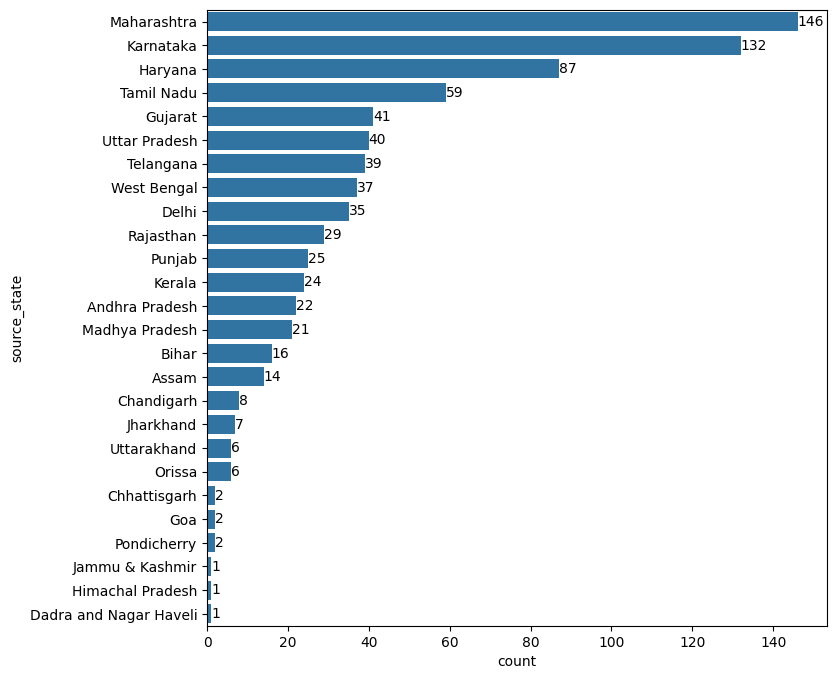

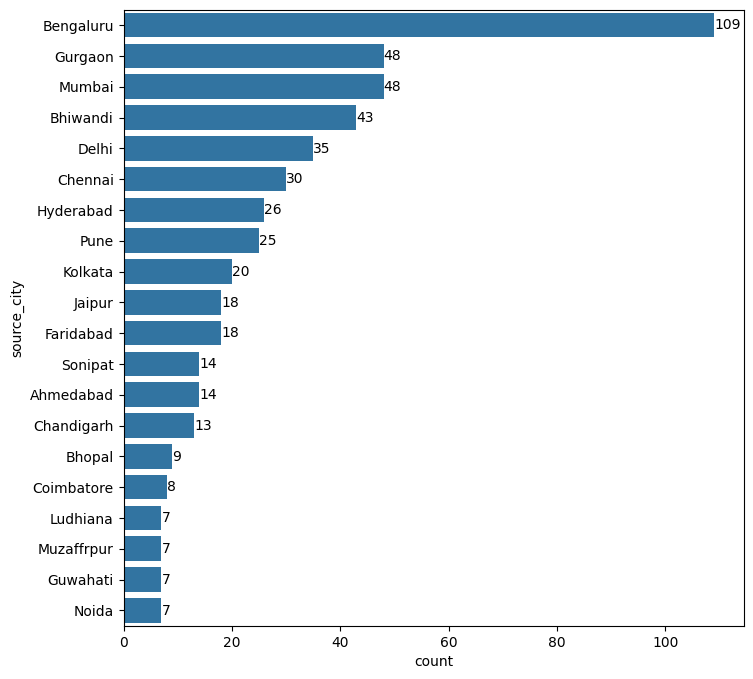

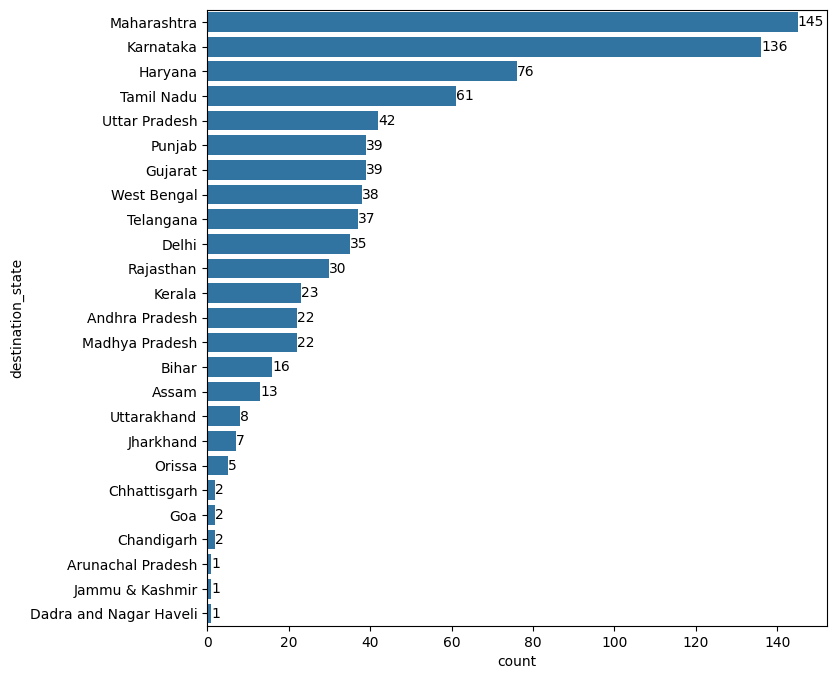

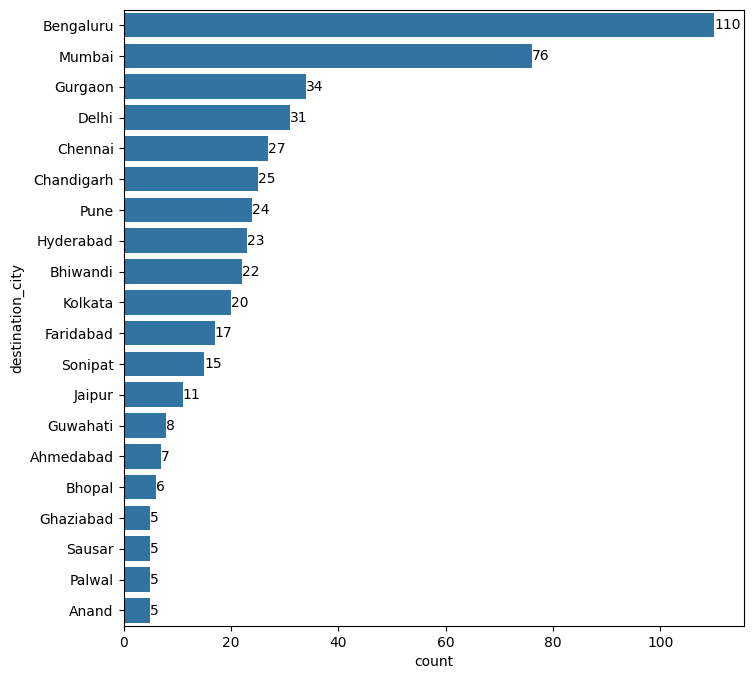

In [33]:
plt.figure(figsize=(8,8))
data = trip_df["source_state"]
ax=sns.countplot(y = data, order=data.value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()

plt.figure(figsize=(8,8))
data = trip_df["source_city"]
ax=sns.countplot(y = data, order=data.value_counts()[:20].index)
ax.bar_label(ax.containers[0])
plt.show()

plt.figure(figsize=(8,8))
data = trip_df["destination_state"]
ax=sns.countplot(y = data, order=data.value_counts().index)
ax.bar_label(ax.containers[0])
plt.show()

plt.figure(figsize=(8,8))
data = trip_df["destination_city"]
ax=sns.countplot(y = data, order=data.value_counts()[:20].index)
ax.bar_label(ax.containers[0])
plt.show()

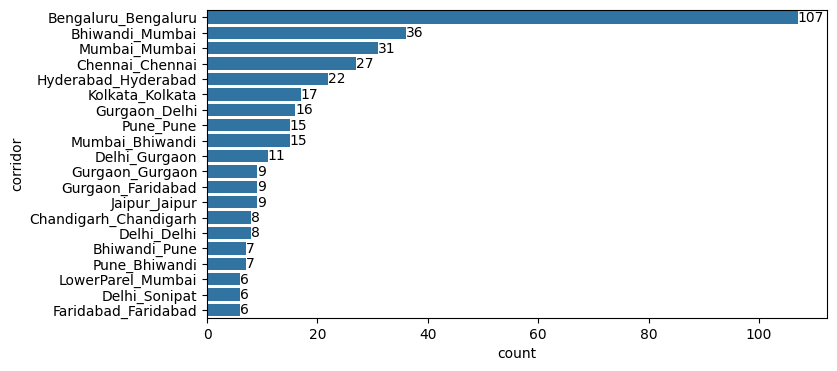

In [34]:
trip_df["corridor"] = trip_df["source_city"] + '_' + trip_df["destination_city"]
plt.figure(figsize=(8,4))
ax=sns.countplot(y = trip_df["corridor"], order=trip_df["corridor"].value_counts()[:20].index)
ax.bar_label(ax.containers[0])
plt.show()

In [35]:
Mumbai_Bhiwandi_df = trip_df[((trip_df["corridor"] == "Bhiwandi_Mumbai") | (trip_df["corridor"] == "Mumbai_Bhiwandi"))]
print('Avg time: ', Mumbai_Bhiwandi_df['actual_time'].mean())
print('Avg distance: ', Mumbai_Bhiwandi_df['actual_distance_to_destination'].mean())

Avg time:  80.13725490196079
Avg distance:  21.923059279986813


### 4.6.4. Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler

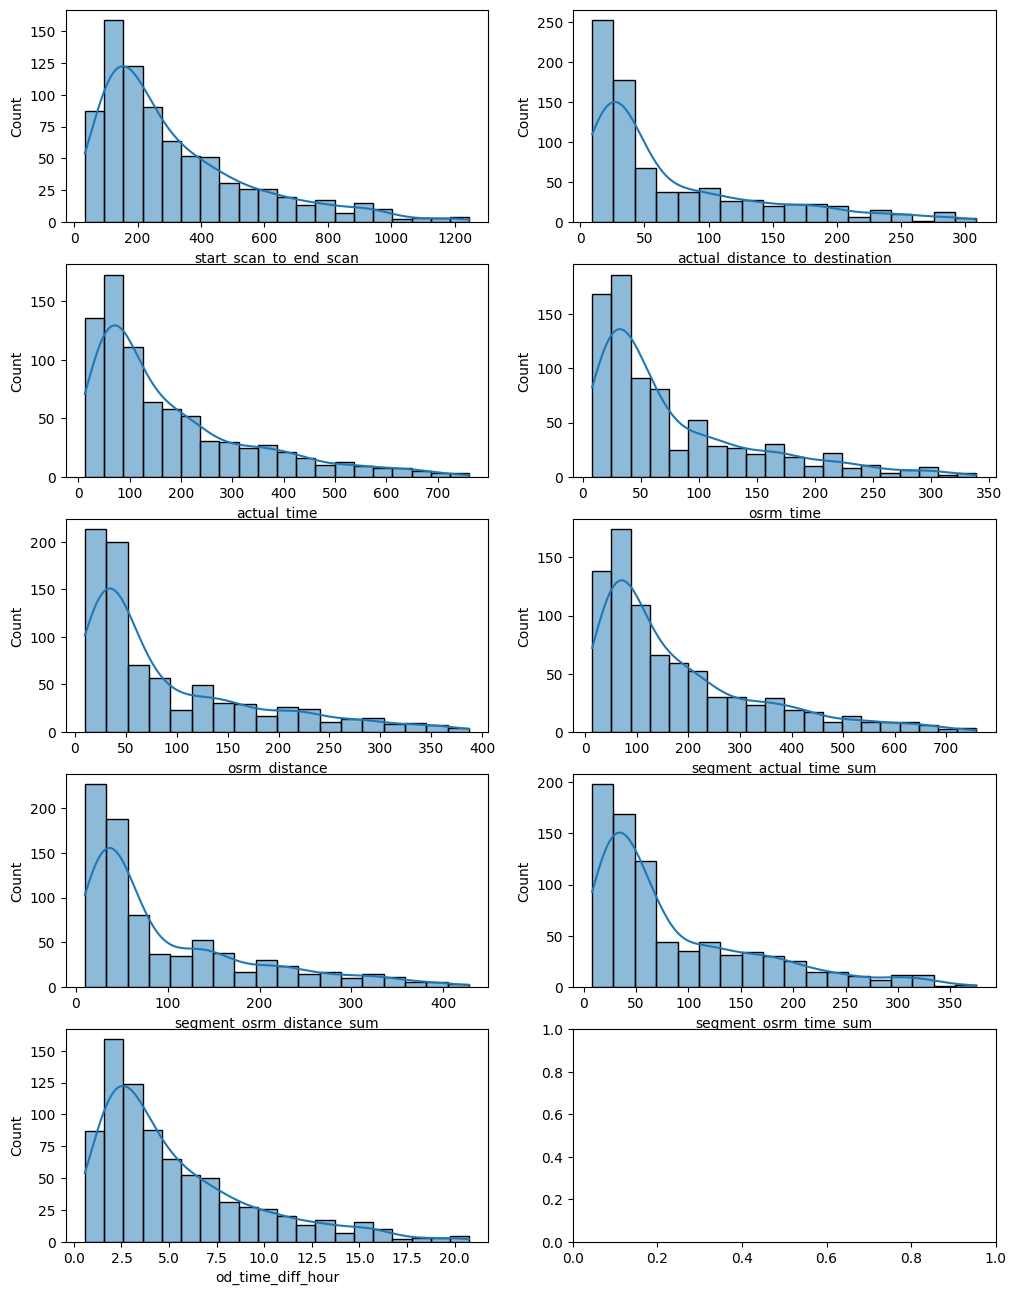

In [36]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize = (12, 16))
sns.histplot(data=trip_df, x = "start_scan_to_end_scan", kde=True, ax=ax[0,0])
sns.histplot(data=trip_df, x = "actual_distance_to_destination", kde=True, ax=ax[0,1])
sns.histplot(data=trip_df, x = "actual_time", kde=True, ax=ax[1,0])
sns.histplot(data=trip_df, x = "osrm_time", kde=True, ax=ax[1,1])
sns.histplot(data=trip_df, x = "osrm_distance", kde=True, ax=ax[2,0])
sns.histplot(data=trip_df, x = "segment_actual_time_sum", kde=True, ax=ax[2,1])
sns.histplot(data=trip_df, x = "segment_osrm_distance_sum", kde=True, ax=ax[3,0])
sns.histplot(data=trip_df, x = "segment_osrm_time_sum", kde=True, ax=ax[3,1])
sns.histplot(data=trip_df, x = "od_time_diff_hour", kde=True, ax=ax[4,0])
plt.show()

## Insight
- None of the data is gaussian, so we will use MinMaxScaler

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(trip_df[trip_numerical_columns])
trip_df[trip_numerical_columns] = scaler.transform(trip_df[trip_numerical_columns])

In [38]:
trip_df.describe()

,trip_creation_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time_sum,segment_osrm_distance_sum,segment_osrm_time_sum,od_time_diff_hour,route_type_Carting,route_type_FTL
count,803,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000,803.000000
mean,2018-09-22 14:22:30.984476160,0.233833,0.209728,0.222163,0.212398,0.215356,0.220562,0.208766,0.212843,0.233984,0.697385,0.302615
min,2018-09-12 00:25:19.499696,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018-09-17 00:51:12.432029696,0.085879,0.041962,0.066845,0.060423,0.052176,0.065684,0.050090,0.057221,0.086099,0.000000,0.000000
50%,2018-09-22 05:03:15.439192064,0.161024,0.102395,0.143048,0.129909,0.104806,0.140751,0.106279,0.125341,0.161211,1.000000,0.000000
75%,2018-09-27 22:30:54.411694592,0.323699,0.307281,0.304813,0.299094,0.320103,0.302279,0.311008,0.316076,0.324658,1.000000,1.000000
max,2018-10-03 23:54:58.720536,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,NaN,0.200566,0.231793,0.208993,0.213279,0.228915,0.208280,0.219477,0.212802,0.200733,0.459676,0.459676


## 4.7. Hypothesis Testing
### 4.7.1. Are aggregated *actual_time* and aggregated *osrm_time* similar?
H0 : *actual_time* and *osrm_time* are similar \
H1 : *actual_time* and *osrm_time* are different

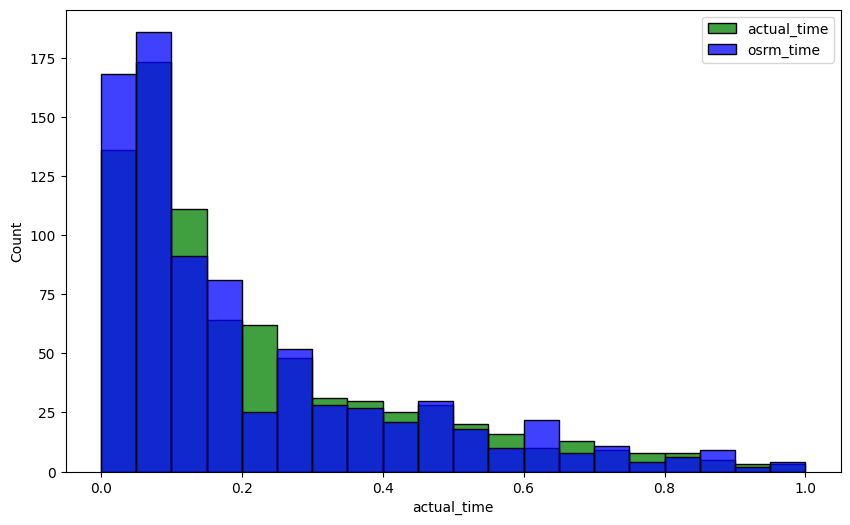

In [39]:
plt.figure(figsize=(10,6))
sns.histplot(trip_df['actual_time'], color='green')
sns.histplot(trip_df['osrm_time'], color='blue')
plt.legend(['actual_time', 'osrm_time'])
plt.show()

This is a 2 sample continuous skewed data, so we will use Mann-Whitney U Test

In [40]:
statistic, pvalue = sps.mannwhitneyu(trip_df['actual_time'], trip_df['osrm_time'], alternative='two-sided')
print('p-value', pvalue)
if pvalue < 0.1:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 0.05989179857412976
The samples are not similar


### Insight
- *actual_time* and *osrm_time* are different

### 4.7.2. Are aggregated *actual_time* and aggregated *segment_actual_time* similar?
H0 : *actual_time* and *segment_actual_time* are similar \
H1 : *actual_time* and *segment_actual_time* are different

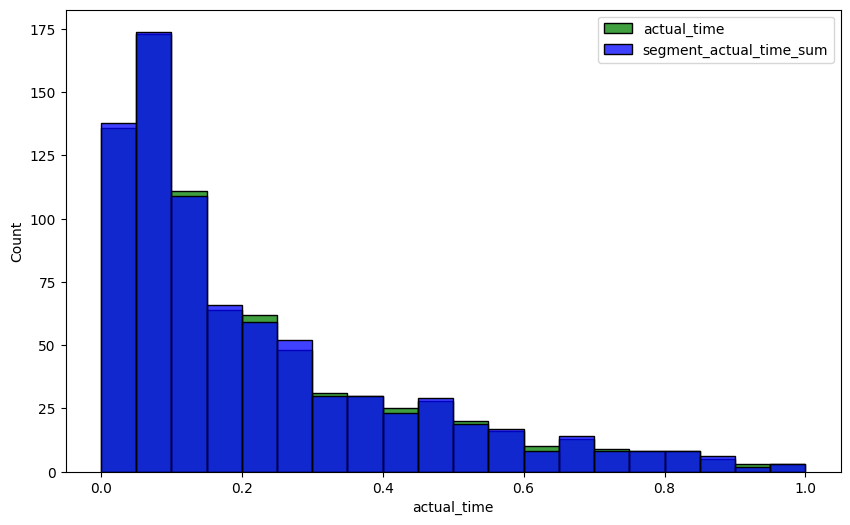

In [41]:
plt.figure(figsize=(10,6))
sns.histplot(trip_df['actual_time'], color='green')
sns.histplot(trip_df['segment_actual_time_sum'], color='blue')
plt.legend(['actual_time', 'segment_actual_time_sum'])
plt.show()

This is a 2 sample continuous skewed data, so we will use Mann-Whitney U Test

In [42]:
statistic, pvalue = sps.mannwhitneyu(trip_df['actual_time'], trip_df['segment_actual_time_sum'], alternative='two-sided')
print('p-value', pvalue)
if pvalue < 0.1:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 0.8852553982731602
The samples are similar 


### 4.7.3. Are aggregated *osrm_distance* and aggregated *segment_osrm_distance* similar?
H0 : *osrm_distance* and *segment_osrm_distance* are similar \
H1 : *osrm_distance* and *segment_osrm_distance* are different

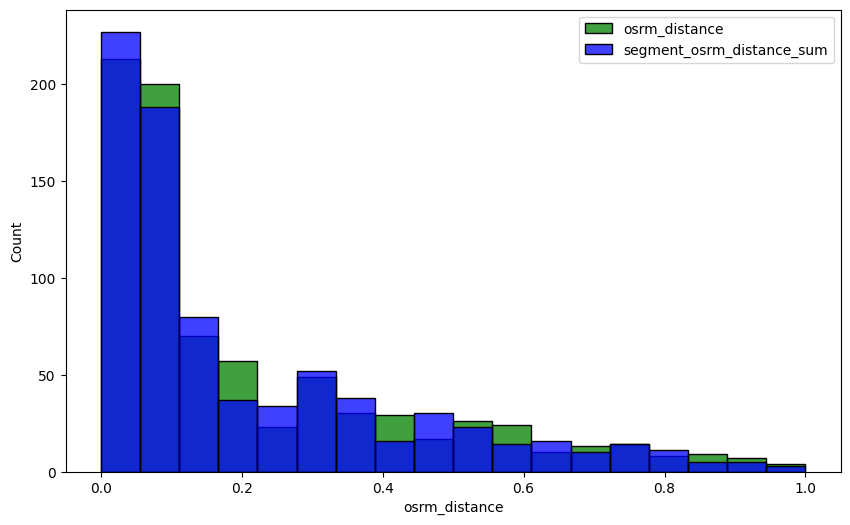

In [43]:
plt.figure(figsize=(10,6))
sns.histplot(trip_df['osrm_distance'], color='green')
sns.histplot(trip_df['segment_osrm_distance_sum'], color='blue')
plt.legend(['osrm_distance', 'segment_osrm_distance_sum'])
plt.show()

This is a 2 sample continuous skewed data, so we will use Mann-Whitney U Test

In [44]:
statistic, pvalue = sps.mannwhitneyu(trip_df['osrm_distance'], trip_df['segment_osrm_distance_sum'], alternative='two-sided')
print('p-value', pvalue)
if pvalue < 0.1:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 0.7183081960681843
The samples are similar 


### 4.7.4. Are aggregated *osrm_time* and aggregated *segment_osrm_time* similar?
H0 : *osrm_time* and *segment_osrm_time* are similar \
H1 : *osrm_time* and *segment_osrm_time* are different

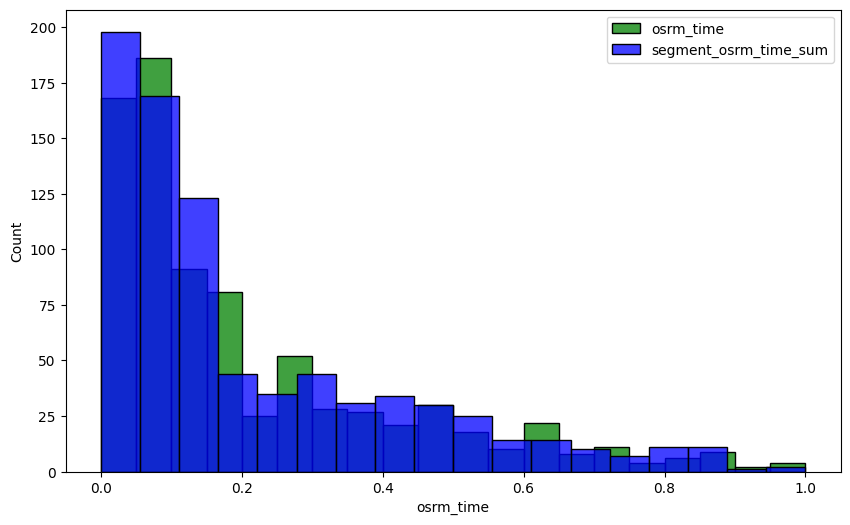

In [45]:
plt.figure(figsize=(10,6))
sns.histplot(trip_df['osrm_time'], color='green')
sns.histplot(trip_df['segment_osrm_time_sum'], color='blue')
plt.legend(['osrm_time', 'segment_osrm_time_sum'])
plt.show()

This is a 2 sample continuous skewed data, so we will use Mann-Whitney U Test

In [46]:
statistic, pvalue = sps.mannwhitneyu(trip_df['osrm_time'], trip_df['segment_osrm_time_sum'], alternative='two-sided')
print('p-value', pvalue)
if pvalue < 0.1:
    print('The samples are not similar')
else:
    print('The samples are similar ')

p-value 0.9068776407781831
The samples are similar 


# 5. Business Insights

- The most common route type is **Carting**
- The top 3 **source states** are **Maharastra, Karnataka and Haryana**
- The top 3 **source cities** are **Bengaluru, Mumbai and Gurgaon**
- The top 3 **destination states** are **Maharastra, Karnataka and Haryana**
- The top 3 **destination cities** are **Bengaluru, Mumbai and Gurgaon**
- Most of the packages are sent and received within Bengaluru, Mumbai and Chennai but the **most bussiest corridor is Bhiwandi-Mumbai**
- Aggregated **actual_time** and aggregated **osrm_time** are **not similar**
- Aggregated **actual_time** and aggregated **segment_actual_time** are **similar**
- Aggregated **osrm_distance** and aggregated **segment_osrm_distance** are **not similar**
- Aggregated **osrm_time** and aggregated **segment_osrm_time** are **similar**

 # 6. Recommendation

- The company should advertise more on route type FTL saying it is faster mode of delivery. This way FTL can be suggested to alteast large organization.
- Cities Bengaluru(Karnataka), Mumbai(Maharastra) and Gurgaon(Haryana) send and recieve the majority of the deliveries. The company should keep the customers of these cities satisfied with the better and faster services. This involves improving the OSRM engine to make better delivery time predictions.